In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
from windrose import WindroseAxes
from windrose import plot_windrose
import matplotlib.cm as cm
from PIL import Image
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from fbprophet import Prophet
import math
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline

#from common.utils import load_data, mape

#pd.options.display.float_format='{:,.2f}'.format
#np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")



df = pd.read_csv('preprocessed_data_15_weeks.csv')
df.ds= pd.to_datetime(df.ds)

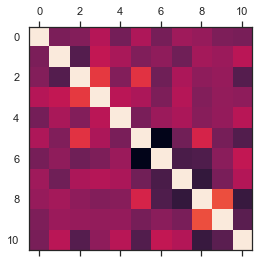

In [20]:
plt.matshow(df.corr())
plt.show()

In [21]:
#a_hum=(6.112*r_hum*math.exp((17.62*temp)/(243.12+temp)))/(461.5*(temp+273.15))
#df['a_hum'] = df.apply(lambda row: (6.112*row['r_hum']*math.exp((17.62*row['temp'])/(243.12+row['temp'])))/(461.5*(row['temp']+273.15)))
a_hum = []
counter = 0
for row in range(len(df['r_hum'])):
    ah=(6.112*df['r_hum'][row]*math.exp((17.62*df['temp'][row])/(243.12+df['temp'][row])))/(461.5*(df['temp'][row]+273.15))
    a_hum.append(ah)
df['a_hum']=a_hum
df.head()
#df=df.set_index('ds')

,ds,dan,temp,r_hum,co_2,aqi_i,temp_e,r_hum_e,press,wind_s,wind_a,aqi_e,a_hum
0,2020-12-28 01:00:00,1.0,26.262567,40.976413,728.598900,67.941840,2.410,100.000000,998.0,7.200000,130.0,60.666667,0.010100
1,2020-12-28 02:00:00,1.0,25.984767,40.775907,675.325533,65.810073,2.890,100.000000,998.0,4.600000,120.0,52.000000,0.009896
2,2020-12-28 03:00:00,1.0,25.831253,40.658130,659.029267,64.538170,2.885,96.500000,999.0,5.400000,155.0,40.333333,0.009783
3,2020-12-28 04:00:00,1.0,25.716143,40.527917,642.445900,64.224107,4.110,90.666667,999.0,7.700000,150.0,21.000000,0.009689
4,2020-12-28 05:00:00,1.0,25.571363,40.354333,638.112600,64.128677,5.000,84.000000,999.0,5.633333,100.0,11.666667,0.009570


In [22]:
df = df.drop(['ds', 'dan', 'temp','r_hum','temp_e','r_hum_e'], axis=1)
df['wind_component'] = df['wind_s'] * np.sin(df['wind_a'])
df['wind_component'] = df['wind_component'].clip(lower=0)
df = df.drop(['wind_s', 'wind_a'], axis=1)
#df = df[df.co_2 > 1200]
df.shape

(2460, 6)

In [23]:
df.head()

,co_2,aqi_i,press,aqi_e,a_hum,wind_component
0,728.598900,67.941840,998.0,60.666667,0.010100,0.000000
1,675.325533,65.810073,998.0,52.000000,0.009896,2.670811
2,659.029267,64.538170,999.0,40.333333,0.009783,0.000000
3,642.445900,64.224107,999.0,21.000000,0.009689,0.000000
4,638.112600,64.128677,999.0,11.666667,0.009570,0.000000


In [24]:
df = df[df.co_2 < 1200]
df.shape

#x = df.values #returns a numpy array
#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled)
#df.head()

(485, 6)

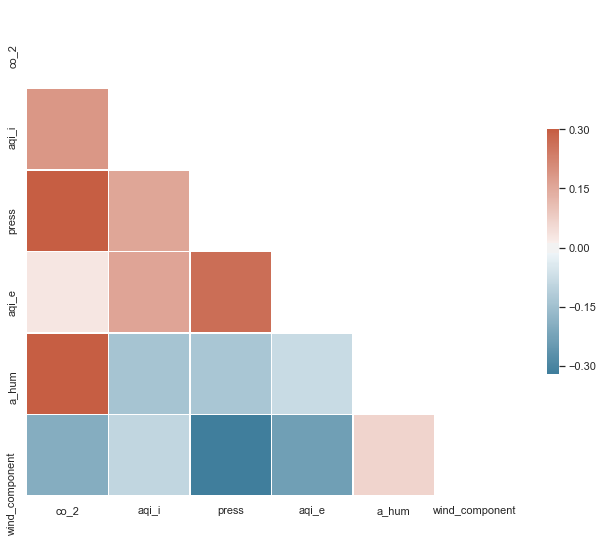

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})